In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import shap
from dmgpred.cleaning import clean_single
from dmgpred.featurize import featurize_single
from dmgpred.utils import loading
from joblib import load

sklearn.set_config(transform_output="pandas")

sns.set_theme()

In [5]:
data = loading.load_data("../data/", processed=True)
X_train = data["X_train"]
X_val = data["X_test"]
y_train = data["y_train"]

In [6]:
DATA_PATH = "../data/"
OUTPUT_PATH = "../output/"
TEST_VALUES_PATH = f"{DATA_PATH}/test_values.csv"
TRAIN_VALUES_PATH = f"{DATA_PATH}/train_values.csv"
TRAIN_LABELS_PATH = f"{DATA_PATH}/train_labels.csv"
SUBMISSION_PATH = f"{OUTPUT_PATH}/Mandalorians_prediction.csv"
INDEX_COL = "building_id"

In [20]:
model = load(f"{OUTPUT_PATH}trained_model.pkl")

classifier =  model.named_steps["clf"]
X_val_prcd = model.named_steps["preprocessor"].transform(X_val)
shap_values = shap.TreeExplainer(classifier.booster_).shap_values(X_val_prcd)

In [52]:
model

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('normalizer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('percentage_normalizer',
                                                                   PowerTransformer(),
                                                                   ['area_percentage',
                                                                    'height_percentage'])],
                                                    verbose_feature_names_out=False)),
                                 ('encoder',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('nominal',
                                                                   JamesSteinEncoder(),
                                                                   Index(['founda...nd_surface_condition',
       'legal_ownership_status', 'other_floor_type', 'plan_configuration',
       'position', 'roof_type'],
      dtype='object')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(),
                                                                   ['count_families'])],
                                                    verbose_feature_names_out=False)),
                                 ('selector',
                                  SelectKBest(k=15,
                                              score_func=<function mutual_info_classif at 0x7f6c9de1bb50>))])),
                ('clf', LGBMClassifier(objective='multiclass'))])

In [41]:
shap_values[:,:,2].mean(0)

array([ 7.11431528e-03,  6.17678109e-03, -4.11330194e-05, -2.08131694e-03,
       -1.02536949e-03,  1.15588569e-03,  1.56126943e-03,  6.62110786e-04,
       -1.42698574e-03, -9.45239726e-03,  3.55195316e-05,  1.02985022e-04,
        2.44914820e-04,  1.43520203e-02, -1.23545197e-02])

In [47]:
shap_values[:,:,2].mean(0)


array([ 7.11431528e-03,  6.17678109e-03, -4.11330194e-05, -2.08131694e-03,
       -1.02536949e-03,  1.15588569e-03,  1.56126943e-03,  6.62110786e-04,
       -1.42698574e-03, -9.45239726e-03,  3.55195316e-05,  1.02985022e-04,
        2.44914820e-04,  1.43520203e-02, -1.23545197e-02])

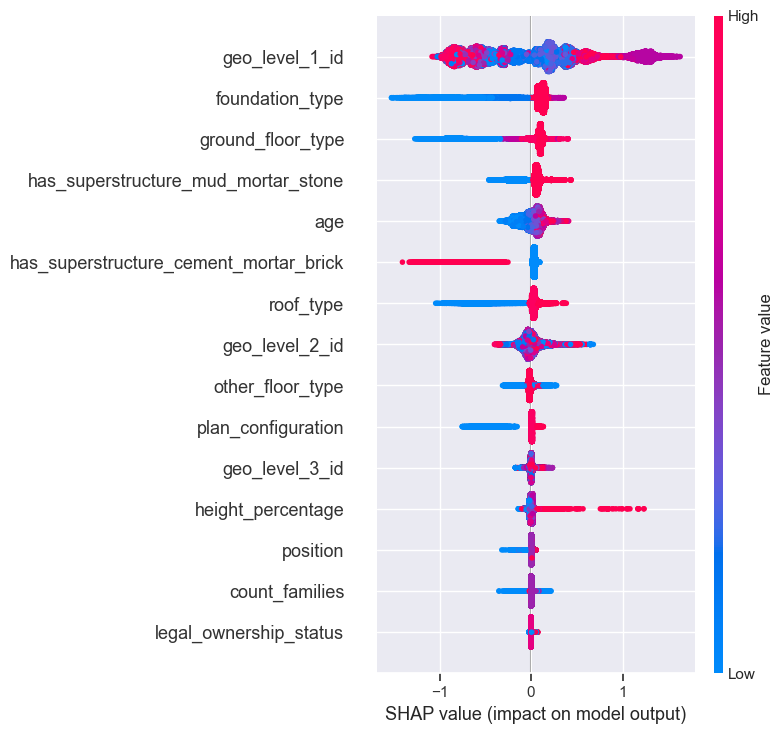

In [51]:
shap.summary_plot(shap_values[:,:,2],X_val_prcd)

In [33]:
shap.plots.text(shap_values)


AttributeError: 'numpy.ndarray' object has no attribute 'values'